# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import pandas as pd
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
#!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head(2)

In [3]:
dummies = pd.get_dummies(penguins['sex'], drop_first=True)
penguinsdum = pd.concat([penguins,dummies],axis=1)
dummies = pd.get_dummies(penguins['species'])
penguinsdum = pd.concat([penguinsdum,dummies],axis=1)
dummies = pd.get_dummies(penguins['island'])
penguinsdum = pd.concat([penguinsdum,dummies],axis=1)
penguinsdum.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,male,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,1,0,0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,1,0,0,0,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lr = LinearRegression()

In [5]:
#Model 1 w/ 9 predictor variables
X = penguinsdum[['bill_length_mm','flipper_length_mm','body_mass_g','male','Adelie','Chinstrap','Dream','Biscoe']]
y = penguins['bill_depth_mm']

#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)
#Fit based on training data
model1 = lr.fit(X_train,y_train)
#Use test data to predict
y_pred = lr.predict(X_test)

#Calculate mse and r^2 for model
mseM1 = mean_squared_error(y_test,y_pred)
print(f"Model 1 MSE: {mseM1}")

r2M1 = r2_score(y_test, y_pred)
print(f"Model 1 R^2 Score: {r2M1}")

Model 1 MSE: 0.5316301053103948
Model 1 R^2 Score: 0.8662646341808218


In [6]:
#Model 2 w/ 7 predictor variables
X = penguinsdum[['bill_length_mm','flipper_length_mm','body_mass_g','Adelie','Torgersen','Gentoo','Dream']]
y = penguins['bill_depth_mm']

#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)
#Fit based on training data
model2 = lr.fit(X_train,y_train)
#Use test data to predict
y_pred = lr.predict(X_test)

#Calculate mse and r^2 for model
mseM2 = mean_squared_error(y_test,y_pred)
print(f"Model 2 MSE: {mseM2}")

r2M2 = r2_score(y_test, y_pred)
print(f"Model 2 R^2 Score: {r2M2}")

Model 2 MSE: 0.5708290769473432
Model 2 R^2 Score: 0.8564038517322015


In [7]:
#Model 3 w/ 5 predictor variables
X = penguinsdum[['bill_length_mm','flipper_length_mm','body_mass_g','Chinstrap','Torgersen']]
y = penguins['bill_depth_mm']

#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)
#Fit based on training data
model3 = lr.fit(X_train,y_train)
#Use test data to predict
y_pred = lr.predict(X_test)

#Calculate mse and r^2 for model
mseM3 = mean_squared_error(y_test,y_pred)
print(f"Model 3 MSE: {mseM3}")

r2M3 = r2_score(y_test, y_pred)
print(f"Model 3 R^2 Score: {r2M3}")

Model 3 MSE: 2.4204361135003762
Model 3 R^2 Score: 0.3911219363848286


In [8]:
#Model 4 w/ 3 predictor variables
X = penguinsdum[['bill_length_mm','flipper_length_mm','body_mass_g']]
y = penguins['bill_depth_mm']

#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)
#Fit based on training data
model4 = lr.fit(X_train,y_train)
#Use test data to predict
y_pred = lr.predict(X_test)

#Calculate mse and r^2 for model
mseM4 = mean_squared_error(y_test,y_pred)
print(f"Model 4 MSE: {mseM4}")

r2M4 = r2_score(y_test, y_pred)
print(f"Model 4 R^2 Score: {r2M4}")

Model 4 MSE: 2.713689329600063
Model 4 R^2 Score: 0.31735198667544506


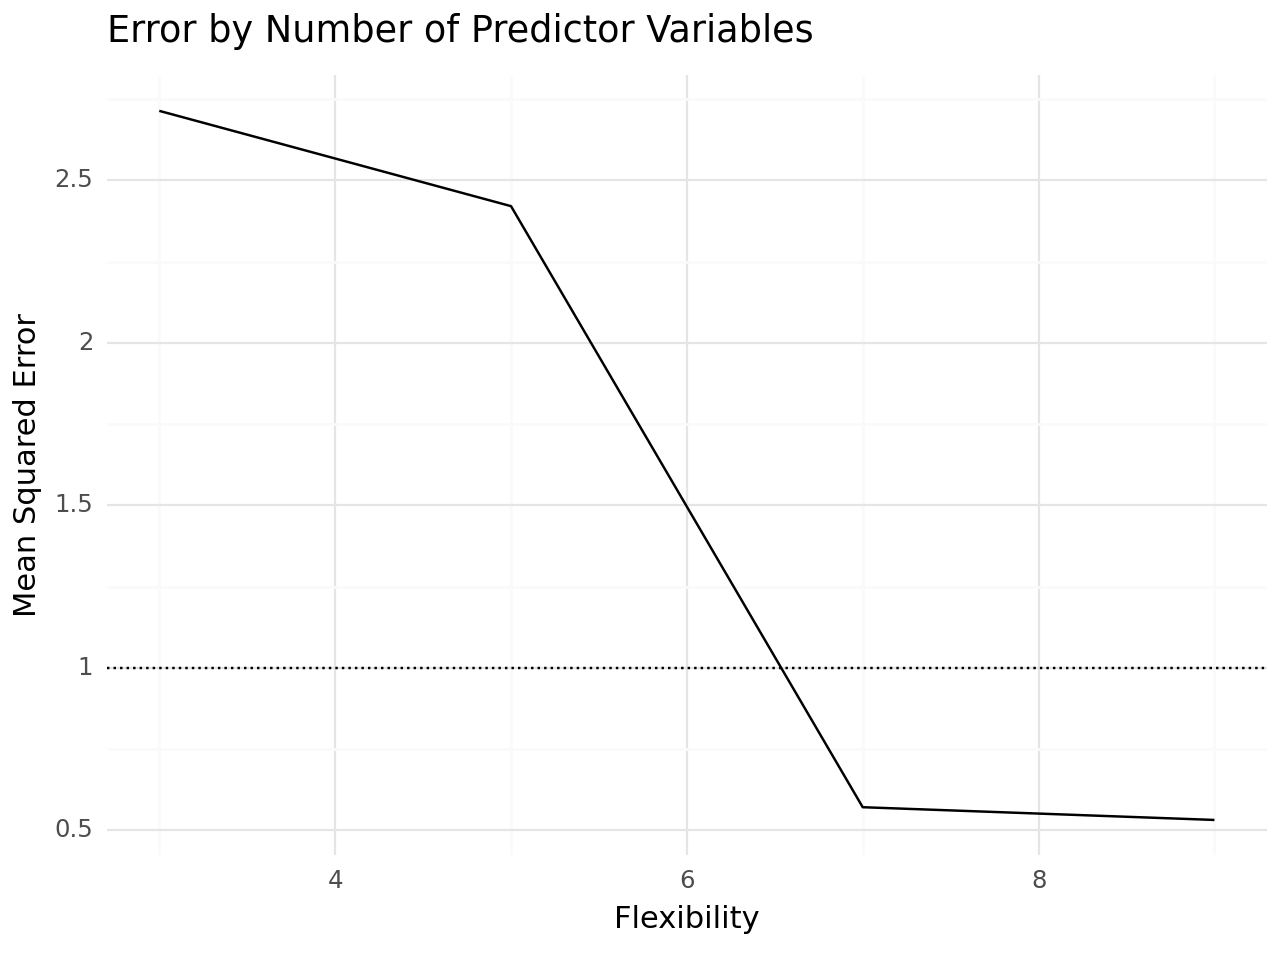

In [9]:
# Create a dataframe for plotting
mse_data = pd.DataFrame({
    'Number_of_Predictors': [3, 5, 7, 9],
    'MSE': [mseM4, mseM3, mseM2, mseM1]
})

# Create plot
(ggplot(mse_data, aes('Number_of_Predictors', 'MSE', group=1))
 + geom_line()
 + geom_hline(aes(yintercept=1), linetype="dotted")
 + labs(x='Flexibility', y='Mean Squared Error', title='Error by Number of Predictor Variables')
 + theme_minimal()
).draw()



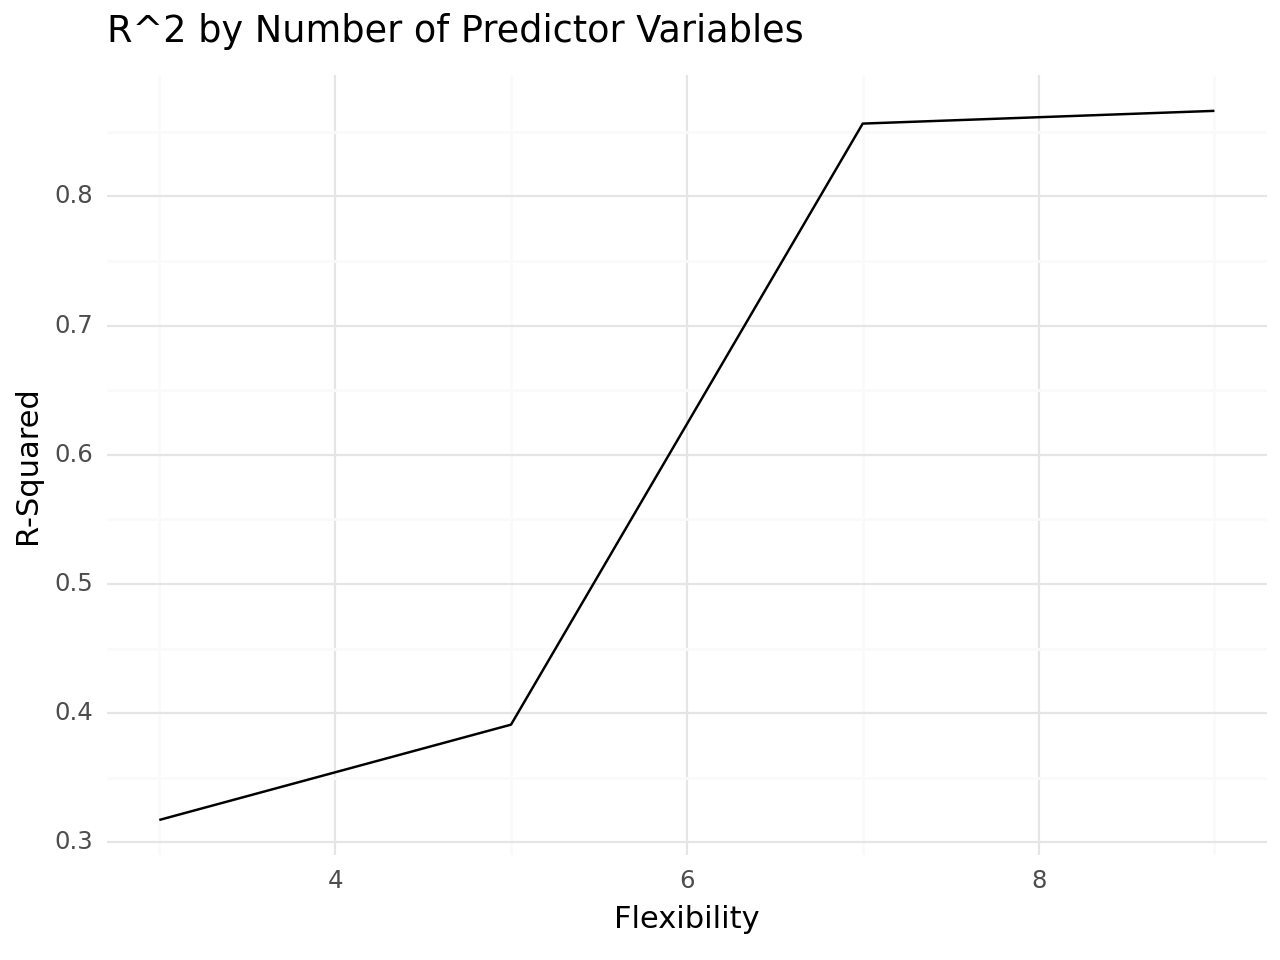

In [16]:
# Create a dataframe for plotting
r_data = pd.DataFrame({
    'Number_of_Predictors': [3, 5, 7, 9],
    'R_score': [r2M4,r2M3 , r2M2, r2M1]
})

# Create plot
(ggplot(r_data, aes('Number_of_Predictors', 'R_score', group=1))
 + geom_line()
 + labs(x='Flexibility', y='R-Squared', title='R^2 by Number of Predictor Variables')
 + theme_minimal()
).draw()

The models with more predictor variables had lower error values when predicting on the penguins dataset. This was to be expected.